# Week3 - Homework

Write a rule based predictor for the dataset below.

Choose one of the following datasets and do your EDA.
Test your assumptions.

Finally write your code in `predict_one` function.

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36277 entries, 0 to 36276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    36277 non-null  object
 1   gender  36277 non-null  object
dtypes: object(2)
memory usage: 567.0+ KB
None

Male Female Distribution with respective count:
gender
F    21789
M    14488
Name: count, dtype: int64


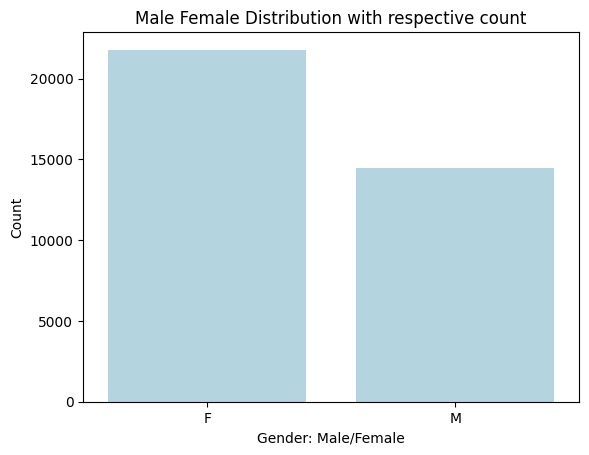

In [65]:
#importing the essential libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#loading the data set
us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'

df = pd.read_csv(us_names)#reading the file
df.dropna(inplace=True) #dropping missing values
information = df.info()
print(information) #printing the basic info
genval = df.gender.value_counts()
print()
print('Male Female Distribution with respective count:')
print(genval) #printing the gender value count

mincount = min(df['gender'].value_counts())
male = df[df['gender'] == 'M'].sample(mincount, random_state=42)
female = df[df['gender'] == 'F'].sample(mincount, random_state=42)

sns.countplot(x=df['gender'],color='lightblue')
plt.title('Male Female Distribution with respective count')
plt.xlabel('Gender: Male/Female')
plt.ylabel('Count')
plt.show()

Balanced Distribution:
gender
F    14488
M    14488
Name: count, dtype: int64


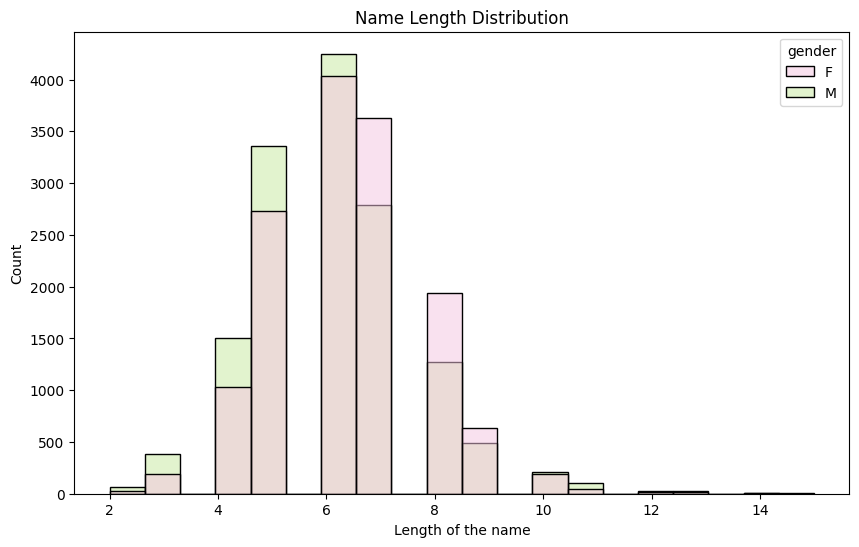

In [66]:
df = pd.concat([female, male]).reset_index(drop=True) #balnced set
bgd = df.gender.value_counts()
print("Balanced Distribution:")
print(bgd)

df['name_length'] = df['name'].apply(len)

#plotting the graph
plt.figure(figsize=(10, 6))
sns.histplot(df, x='name_length', hue='gender', bins=20, palette='PiYG')
plt.title('Name Length Distribution')
plt.xlabel("Length of the name")
plt.ylabel("Count")
plt.show()

In [43]:
df.gender.value_counts()

,count
gender,
F,14488
M,14488


Not balanced! For simplicity, let's create a sub sample that will contains equal F and M.

In [ ]:
min_count = min(df['gender'].value_counts())

df_f = df[df['gender'] == 'F'].sample(min_count, random_state=42)
df_m = df[df['gender'] == 'M'].sample(min_count, random_state=42)

df = pd.concat([df_f, df_m]).reset_index(drop=True)

In [ ]:
df.gender.value_counts()

gender
F    14488
M    14488
Name: count, dtype: int64

In [ ]:
df.head()

,name,gender
0,Brennen,F
1,Chikaima,F
2,Zoejane,F
3,Teegan,F
4,Alanda,F


## Part1:

Run experiments to select which rules are good seperator for gender.

### Two examples:

In [ ]:
df['is_last_letter_vowel'] = [  name[-1:] in 'aeiou' for name in df.name]

In [ ]:
df

,name,gender,is_last_letter_vowel
0,Brennen,F,False
1,Chikaima,F,True
2,Zoejane,F,True
3,Teegan,F,False
4,Alanda,F,True
...,...,...,...
28971,Arther,M,False
28972,Jamani,M,True
28973,Mickeal,M,False
28974,Chad,M,False


<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

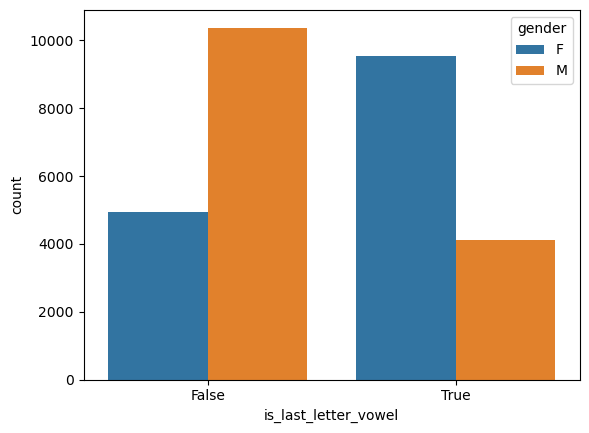

In [ ]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<Axes: xlabel='len', ylabel='count'>

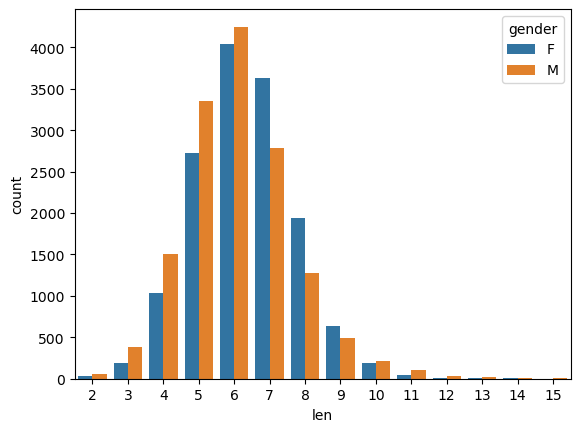

In [ ]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

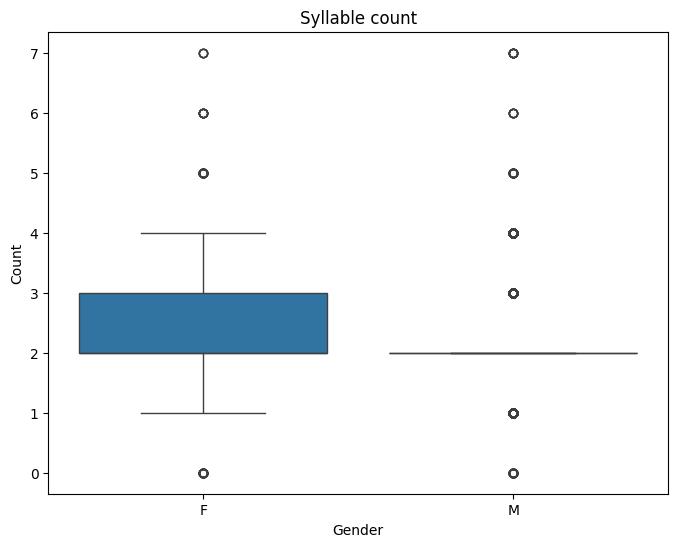

In [64]:
#to check the syllables in a name
def syllables(name):
  vowelsinname = 'AEIOUaeiou'
  total_count= sum(1 for i in range(len(name))if name[i] in vowelsinname and (i ==0 or name[i-1] not in vowelsinname))
  return total_count

df['syllables'] = df['name'].apply(syllables)

#plotting the graph
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='gender',y='syllables')
plt.title('Syllable count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Part2

Write the inference function based on the findings...

In [56]:
def predict_one(name): # <-- (Don't change the function signature) DO NOT CHANGE THIS LINE
    # write your codes below this line....
    name = name.lower()
    last_of_the_name = name[-1]

    if last_of_the_name in 'aiey': #Female
      return 'F'
    if last_of_the_name in 'rtnd': #Male
      return 'M'

    return 'M' if len(name) <=4 else 'F'

# print(predict_one('Jasmine'))

In [57]:
## DO NOT CHANGE ANYTHING IN THIS CELL!!!
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6394947542794036


## Part3


Write the above function in one of the following languages:
1. javascript
2. sql

For javascript:

The following is the starter code.

* Open a new file in week3 folder name it `name_predictor.html`

* Fill the `predictOne` function based on the function above

* Save and double click on the html file to test it.


For sql:

The following is a sample function code for postgres.
If you don't have a database engine installed on your computer, you can use: https://onecompiler.com/

If you already have a local server, use that to create a function that contains the logic you came up with.
